![](images/openclass_banner_190.jpeg)

<div class="bg-primary text-center">
    - Summary -
</div>

**Line Following** is a foundational skill that underpins many practical applications in robotics. It facilitates efficient navigation, enhances automation, serves as an educational stepping stone, and provides a basis for more advanced robotic functions.

In this Open Class, we’ll explore how to implement a line-following robot using **OpenCV** and **ROS2**.
 

What you'll learn:
- _Introduction to Line-Following Robots_
- _OpenCV computer vision Fundamentals_
- _Integration of OpenCV with ROS2 to process images and control robot movement_
- _Step-by-step guidance on coding and setting up a line-following robot_

You'll be using the **BOTBOX** throughout the training.

## BOTBOX is a lab-in-a-box to teach robotics, including off-the-shelf robots, the environment, simulations, and projects for your students.

### Your students need to install nothing in order to start programming the robots. Everything is web based and works in any computer.

Have full control of your student’s progress.

![](images/IMG_3494.JPG)

![](images/demosim.png)

## The Botbox package includes:

![](images/botbox_package.png)

## Get more info at https://www.theconstruct.ai/botbox-warehouse-lab/

<div class="bg-primary text-center">
    - End of Summary -
</div>

<div>
    <h1 class="text-center">
        <span class="text-primary">Introduction</span>
        &nbsp;
        <span class="">What are line following robots? <br><img src="https://d2arb8tkr7ck9i.cloudfront.net/wp-content/uploads/2018/01/22145517/1501941_agvs_069_HQ.jpg"  /></span>
            

    
</div>

**Line following** is a fundamental concept in mobile robotics, where a robot is designed to follow a predefined line or path on the ground or surface. This is achieved by using sensors or computer vision that can detect the line or path, typically through contrast or color differences between the line and the surrounding area.

Line following is useful for robotics for several reasons:

1. **Navigation**: It provides a simple and effective way for robots to navigate through a controlled environment, such as factories, warehouses, or specific areas where a predefined path needs to be followed.

2. **Automation**: Line following robots can be used for automated material handling, transportation, or delivery tasks, as they can reliably follow a predetermined route without the need for complex navigation systems.

3. **Education and research**: Line following is often used as an introductory project in robotics education and research, as it allows students and researchers to explore fundamental concepts of robot control, sensor integration, and path planning in a simplified and controlled setting.


## So what is this about OpenCV ?

OpenCV plays a crucial role in enabling computer vision capabilities for various robotics applications, including line following.

OpenCV can be easily integrated into ROS through the `cv_bridge` package, which provides an interface between OpenCV and ROS image messages. This integration allows ROS nodes to subscribe to image topics, process the images using OpenCV functions, and publish the results or control commands back to other ROS nodes.

Here's an example of how OpenCV can be used in the context of ROS for line following:

1. **Image Acquisition**: A ROS node subscribes to an image topic published by a camera or other image source on the robot.

2. **Image Processing**: The received image is converted to an OpenCV format using the `cv_bridge` package. Then, OpenCV functions are applied to the image to detect the line or path. This can involve techniques like color thresholding, edge detection, or contour analysis, depending on the specific line or path characteristics.

3. **Line Extraction**: Once the line or path is detected, OpenCV algorithms are used to extract relevant information, such as the line's position, orientation, and curvature.

4. **Path Planning and Control**: The extracted line information is then published to other ROS nodes responsible for path planning and motor control. These nodes use the line data to calculate the necessary commands for the robot's actuators (e.g., wheels, motors) to follow the line or path.

5. **Visualization and Debugging**: OpenCV can also be used to visualize the processed images and overlay line or path information, which can be useful for debugging and monitoring the line following process.


<div>
    <h1 class="text-center">
        <span class="text-primary">Mission Plan ✍️</span>
        &nbsp;
        <span class="">The goal for this openclass 📝</span>
    </h1>
</div>

If you have purchased the botbox set from us or you have used the gazebo from the previous Open Class then you may have noticed that the botbox set already comes with line following lines included as part of its set.

Your mission for today is to use these tracks to navigate to diffrent areas of the warehouse allowing your boxbot to do it's tasks !

![](https://global.discourse-cdn.com/business7/uploads/ros/optimized/3X/b/d/bd8695cf2848499464c53920439bcc8f1e9b683f_2_1380x776.jpeg)

![](images/sim.png)

Ready for a challenge? Lets go! 

<div>
    <h1 class="text-center">
        <span class="">Launch the simulation</span>
    </h1>
</div>

We will need to do a small step before launching which is get out April tags into our gazebo environment. 

To launch the project simulation:

1. Open a terminal by clicking:

<img src="images/rosject_toolbar_terminal.png"/>

2. Run the launch script 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
ros2 launch tortoisebot_bringup simulation.launch.py

**Wait around 30 seconds** for simulation to start. It should automatically appear in a Gazebo window.

If it doesn't automatically appear, open the Gazebo window by clicking:

<img src="images/rosject_toolbar_gazebo.png"/>

Gazebo window should show the Tortoisebot Warehouse world:

<img src="images/sim.png"/>

# Creating our line navigation package

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
cd ~/ros2_ws/src/ 
ros2 pkg create --build-type ament_python line_navigation --dependencies rclpy std_msgs geometry_msgs sensor_msgs cv2 cv_bridge  

First let's make a simple node that just shows our camera

![](images/add_package.png)

To find the topic we need to subscribe to run

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
ros2 topic list

In [ ]:
user:~/ros2_ws$ ros2 topic list
/camera/camera_info
/camera/image_raw
/camera/image_raw/compressed
/camera/image_raw/compressedDepth
/camera/image_raw/theora
/clock
/cmd_vel
/joint_states
/odom
/parameter_events
/performance_metrics
/robot_description
/rosout
/scan
/tf
/tf_static

Now we can see that `/camera/image_raw` is the topic we want to use. 

Let's write a script to just first display the feed into an opencv window. 

You might remember this script from the previous open class.

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    line_navigation.py
</span>

In [ ]:
import rclpy
from rclpy.node import Node
from sensor_msgs.msg import Image
import cv2
from cv_bridge import CvBridge

class ImageSubscriber(Node):
    def __init__(self):
        super().__init__('image_subscriber')
        self.subscription = self.create_subscription(
            Image,
            '/camera/image_raw',
            self.listener_callback,
            10)
        self.subscription  # prevent unused variable warning
        self.bridge = CvBridge()

    def listener_callback(self, data):
        current_frame = self.bridge.imgmsg_to_cv2(data, desired_encoding='bgr8')
        cv2.imshow("Camera Feed", current_frame)
        cv2.waitKey(1)

def main(args=None):
    rclpy.init(args=args)
    image_subscriber = ImageSubscriber()
    rclpy.spin(image_subscriber)
    image_subscriber.destroy_node()
    rclpy.shutdown()

if __name__ == '__main__':
    main()

Edit the setup.py to add the node as a script. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-file"></i>
    &nbsp;
    setup.py
</span>

In [ ]:
from setuptools import setup

package_name = 'line_navigation'

setup(
    name=package_name,
    version='0.0.0',
    packages=[package_name],
    data_files=[
        ('share/ament_index/resource_index/packages',
            ['resource/' + package_name]),
        ('share/' + package_name, ['package.xml']),
    ],
    install_requires=['setuptools'],
    zip_safe=True,
    maintainer='user',
    maintainer_email='user@todo.todo',
    description='TODO: Package description',
    license='TODO: License declaration',
    tests_require=['pytest'],
    entry_points={
        'console_scripts': [
            'line_navigation_node = line_navigation.line_navigation:main'
        ],
    },
)


Let's build and run our new package. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
cd ~/ros2_ws
colcon build --packages-select line_navigation
source install/setup.bash
ros2 run line_navigation line_navigation_node

In graphical tools you'll see a new opencv window. 

![](images/graphical_tools.png)
![](images/opencv_window.png)


Great, now we can see exactly what the robot's camera will see; the blue line you see is the track that we will want to follow. Let's get to work on making that happen.

Now you might already know this if you've ever used computer vision, but there is something about this image that will make it difficult for us to use directly. There is just too much information in the image!!!

> But what do you mean by that? More data is better, right??? 

The reality is that most of this image is actually useless to us, and in fact, the only part of the image that we really need is the blue part of the image, which is our line. 

That brings us to the concept of a **color space**.

**Color space** in robotics refers to a method used to represent colors in a way that is easily understandable and computationally efficient for machines. In robotics applications, particularly in tasks like object recognition, tracking, and manipulation, accurately detecting and identifying colors is crucial. There are several color spaces used in robotics, with **RGB** (Red, Green, Blue) and **HSV** (Hue, Saturation, Value) being two common ones.

RGB is the most familiar color space, where each color is represented by a combination of red, green, and blue components. While RGB is intuitive and widely used, it's not always the best choice for tasks like color segmentation because variations in lighting conditions can affect the RGB values significantly.

**HSV**, on the other hand, represents colors in terms of their hue, saturation, and value.

- Hue represents the type of color (e.g., red, blue, or green) and is measured in degrees around a color wheel.

- Saturation represents the intensity or purity of the color and is typically expressed as a percentage.

- The value represents the brightness of the color.

![](https://lindevs.com/uploads/posts/content/2021/07/convert_image_from_rgb_to_hsv_color_space_using_opencv.png?v=1680423474)

**HSV** is often preferred in robotics because it *separates the color information* from the brightness information, making it more robust to changes in lighting conditions. This makes it easier to segment objects based on their color, regardless of variations in lighting.

Once we convert the image to this HSV color space we need to isolate the blue color in the image, for this we will use whats called a **binary mask**. You might be familiar with the concept of masking if you've ever used the software Photoshop.

In OpenCV, a **binary mask** is a type of image where each pixel is either black (0) or white (255), typically representing foreground and background regions. It's used for tasks like image segmentation, where you want to isolate certain regions of interest in an image. For instance, in object detection, a binary mask can be created to highlight the pixels corresponding to the detected object while suppressing the rest of the image. **This makes it easier to extract and work with specific objects or regions in an image.**

So lets go through our plan again. 

1. Convert the image from the BGR color space to the HSV color space.
2. Define a range of HSV values that correspond to the blue color.
3. Create a binary mask where pixels within the specified HSV range are set to white (255) and all other pixels are set to black (0).

Let's modify the code accordingly. 

In [ ]:
import rclpy
from rclpy.node import Node
from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import cv2
import numpy as np

class ImageSubscriber(Node):
    def __init__(self):
        super().__init__('image_subscriber')
        self.subscription = self.create_subscription(
            Image,
            '/camera/image_raw',
            self.listener_callback,
            10)
        self.subscription  # prevent unused variable warning
        self.bridge = CvBridge()

    def listener_callback(self, data):
        # Convert ROS Image message to OpenCV image
        current_frame = self.bridge.imgmsg_to_cv2(data, desired_encoding='bgr8')
        
        # Convert BGR to HSV
        hsv_image = cv2.cvtColor(current_frame, cv2.COLOR_BGR2HSV)

        # Define range of blue color in HSV
        lower_blue = np.array([100, 50, 50])   # Lower bound of blue color
        upper_blue = np.array([130, 255, 255])  # Upper bound of blue color

        # Create a binary mask
        blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

        # Apply the mask to the original image
        blue_segmented_image = cv2.bitwise_and(current_frame, current_frame, mask=blue_mask)

        # Display the segmented image
        cv2.imshow("Blue Segmented Image", blue_segmented_image)
        cv2.waitKey(1)

def main(args=None):
    rclpy.init(args=args)
    image_subscriber = ImageSubscriber()
    rclpy.spin(image_subscriber)
    image_subscriber.destroy_node()
    rclpy.shutdown()

if __name__ == '__main__':
    main()

Let's rebuild and run our new package. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
cd ~/ros2_ws
colcon build --packages-select line_navigation
source install/setup.bash
ros2 run line_navigation line_navigation_node

<img src="images/step_1_line.png" style="width: 300px" />


## Step 2 

Bravo !!!

Well we have line ...

Now what ...

Well now we need to detect the line as a line !

What does this mean ? We can see the blue line and so can the robot but right now the robot does not understand where is the line, all it knows is where all the blue is in the image.

For this we will need to use something called Contour detection.

![](https://dontrepeatyourself.org/static/img/edge-and-contour-detection/contour-detection-after-dilation-on-coins.webp)

Contours in image processing are **curves joining continuous points having the same color or intensity**. They are a fundamental concept used for shape analysis and object detection in computer vision. In OpenCV, **contours are represented as a list of points**.

In the context of line detection for robotics, contours are used to approximate the shape of objects or features in an image. Here's how contours are typically used in this case:

- **Detection of Features**: Contours help in identifying regions or features of interest in an image. For example, in line-following applications, contours can help detect the boundaries of the line on the ground.

- **Segmentation**: Once contours are detected, they can be used to segment the image, isolating the regions corresponding to the detected features. In this case, contours help in segmenting the image to focus only on the line.

- **Shape Analysis**: Contours provide information about the shape of objects. For instance, in line detection, contours can give an approximation of the shape of the line, allowing for further analysis such as calculating the slope of the line.

Once we have the Contours in the mask we then need to calculate what is called the **Centroid**. 

The **Centroid** in this case is the geometric center of our **detected Contour**. 

For this we will be using the `cv2.moments()` function of OpenCV.

So now to process each contour we need to:

1. Find the Contours in the mask

The `cv2.findContours()` function can be used to identify contours in the binary image mask. It returns a list of contours and a hierarchy.

2. Iterate over detected Contours and compute its moments

For each contour found, compute its moments using `cv2.moments()`.

The moments M include quantities like area, centroid, etc., which are used to compute properties of the contour.

If the area of the contour (M['m00']) is greater than `MIN_AREA_TRACK`, it is considered significant.

3. Extract Centroid

If a contour satisfies the area conditions, its centroid coordinates (`x` and `y`) are calculated.

line['x'] is set to the x-coordinate of the centroid adjusted by crop_w_start.
line['y'] is set to the y-coordinate of the centroid.

4. Display the processed image

Now that we know this let's edit the code.


In [ ]:
    def get_contour_data(self, mask):
        """
        Return the centroid of the largest contour in the binary image 'mask' (the line) 
        """ 
        # Constants
        MIN_AREA_TRACK = 50  # Minimum area for track marks

        # get a list of contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        line = {}

        for contour in contours:
            M = cv2.moments(contour)

            if (M['m00'] > MIN_AREA_TRACK):
                # Contour is part of the track
                line['x'] = int(M["m10"]/M["m00"])
                line['y'] = int(M["m01"]/M["m00"])

        return (line)


We will make a new function called get_contour_data which will take our mask as an input and output the line as an output.

In [ ]:
        # Detect line and get its centroid
        line = self.get_contour_data(blue_mask)

        # Display the segmented image with line centroid
        if line:
            cv2.circle(blue_segmented_image, (line['x'], line['y']), 5, (0, 0, 255), 7)


Then add it to our `listener_callback` so that it runs every frame we get from the camera.

Let's rebuild and run our package. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
cd ~/ros2_ws
colcon build --packages-select line_navigation
source install/setup.bash
ros2 run line_navigation line_navigation_node

![](images/step_2_result_line.png)


# Take off 🚀

Great job so far !

So far we've isolated our line, detected the contour and calculated our centroid.

Now all that's left is the 'following' part of the line following algorithm.

There are many methods of implementing this part such as PID or model predictive control but thats a little too complicated for this lesson so we will be implmenting a simple proportional control based on the calculated displacement (error) from the centerpoint of the input image multiplied by a proportional constant. 

For this we will travel forward at a constant linear velocity  `x` and only change the angular turning velocity `z`. 

To calculate error we will use: 

```

error = x - width//2
```

This is the  `line['x']` of the line minus the half the width of the image, basically the deviation from the center point.  

For calculating the final angular velocity: 

```
cmd.angular.z = float(error) * -KP
```

Here we take our calculated error and multiply it with a proportional constant. You can finetune the constant to depending on how well the robot turns. 


Add the two constants to the top of the script.

In [ ]:
# Linear forward speed
LINEAR_SPEED = 0.2

# Proportional constant to be applied on speed when turning 
# (Multiplied by the error value)
KP = 1.5/100 

Create a new publisher to publish Twist commands to the /cmd_vel topic. 

In [ ]:
        self.publisher = self.create_publisher(Twist, '/cmd_vel', 10)

Modify the callback code to implement the new calculation and send the command.

In [ ]:
        # Move depending on detection 
        cmd = Twist()
        _, width, _ = blue_segmented_image.shape
        if line:
            x = line['x']

            error = x - width//2

            cmd.linear.x = LINEAR_SPEED
            cv2.circle(blue_segmented_image, (line['x'], line['y']), 5, (0, 0, 255), 7)
        
        # Determine the speed to turn and get the line in the center of the camera.
        cmd.angular.z = float(error) * -KP
        print("Error: {} | Angular Z: {}, ".format(error, cmd.angular.z))

        # Send the command to execute
        self.publisher.publish(cmd)

Let's rebuild and run our package. 

<span class="badge badge-pill badge-primary">
    <i class="fa fa-play"></i>
    &nbsp;
    Execute in a Terminal
</span>

In [ ]:
cd ~/ros2_ws
colcon build --packages-select line_navigation
source install/setup.bash
ros2 run line_navigation line_navigation_node

![](images/fail_1.gif)

# Challenge 🚨

It's working!!! ... until it doesn't. 

The issue seems to be that it detects a line that is very far away and goes to that one instead, which causes it to run into the wall. 

There are actually many ways to fix this issue, like cropping the input frame, for instance. However,  there is already a way to fix this in the code itself. Can you figure it out? 

When you do you should get something like this:

![](images/pass_1.gif)

# Homework

While so far we've been able to follow the line to the end, when it does reach the end, it's at a crossroads of where to go. 

Modify the `get_contour_data` to also detect such situations and edit the `listener_callback` to decide which line to change to and try to replicate the same mission of getting to the dispatch station with just the line following. 

When you have completed it, take a screen recording and tag us on X (twitter) or facebook. 

![](images/final_step.png)

# Share your work 📨

We love seeing what our students do with the things they learn here so please do share what you do on social media and make sure to tag us so we know.

[Twitter (X) | @_TheConstruct_](https://twitter.com/_theconstruct_) 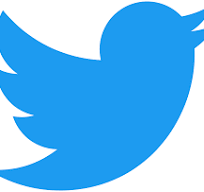

[Facebook | The Construct ](https://www.facebook.com/theconstructsim) 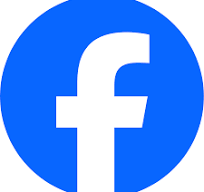
